<h1 style='text-align:center'>Market Research Of Establishments in LA: Restaurants Offer the Best Opportunity to Succeed</h1>

### Date Completed: 6/6/2020
### By: Daniel Garcia Rodriguez

## <p style="color:blue">To reviewer: Hello! I was wondering if I can receive criticism of my work and areas where I can improve? Thank you!! </p>


Presentation: <a href="https://smallpdf.com/shared#st=886bd855-ec0d-4b3d-a262-bb30b418aa9a&fn=Market_Research_LA_Establishment_Project.pdf&ct=1593222242906&tl=share-document&rf=link">Link here</a>

## Project Description

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

## Project Questions (Yandex):
- Investigate the proportions of the various types of establishments. Plot a graph.
- Investigate the proportions of chain and nonchain establishments. Plot a graph.
- Which type of establishment is typically a chain?
- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- Put the data on street names from the address column in a separate column.
- Plot a graph of the top ten streets by number of restaurants.
- Find the number of streets that only have one restaurant.
- For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

## Findings

Opening a restaurant in LA will provide the best opportunities to succeed for the company given the novelty of service provide (Robot-waiters).

- **Large share of establishments in LA**: Restaurants make up roughly 75% of the establishments in LA
- **Less big Players**: Restaurants more likely to be non-chains (68.4%)
- **Recommendation**: Open a small non-chain restaurant with 48 seats– average for a restaurant chain. Aggressively grow thereafter (establish a chain).


## Data Source

rest_data - click <a href='https://code.s3.yandex.net/datasets/rest_data_us.csv'>here</a> here to download the dataset.
- object_name — establishment name
- chain — chain establishment (TRUE/FALSE)
- object_type — establishment type
- address — address
- number — number of seat

## Libraries Used

In [2]:
from matplotlib import ticker
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')

C:\Users\garci\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploring the General Data

In [3]:
#url = 'https://code.s3.yandex.net/datasets/rest_data_us.csv'
practicum = "/datasets/rest_data_us.csv"
df = pd.read_csv(url)

In [4]:
df.sample(3)

,id,object_name,address,chain,object_type,number
407,12193,SMITTEN ICE CREAM,10250 SANTA MONICA BLVD # 9190,False,Restaurant,8
7803,19589,SHORT CAKE,6333 W 3RD ST STE #316,False,Restaurant,19
4095,15881,JINGLE DONUTS,1901 S ALAMEDA ST STE 119,False,Fast Food,28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Null values present in chain column. Let's take a quick look at it.

In [6]:
print(df[df['chain'].isnull()])
print(df['chain'].unique())

         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   
7523  19309     JAMMIN JIMMY'S PIZZA   1641 FIRESTONE BLVD   NaN       Pizza   
8648  20434    THE LEXINGTON THEATER          129 E 3RD ST   NaN  Restaurant   

      number  
7408      14  
7523       1  
8648      35  
[False True nan]


Only three chains were identified as being null; binary values present for column. We'll quickly impute using the mode given the size and binary values.

In [7]:
df['chain'].fillna(df['chain'].mode, inplace=True)
print(df['chain'].isnull().sum())

0


NOTE: Came up into an issue when applying the value counts method of which I was able to identify as being due to the chain column.

In [8]:
for i in df.columns:
    try:
        df[i].value_counts()
    except:
        print('ERROR', i)

To fix this, we'll make the column into a boolean value.

In [9]:
df['chain'] = df['chain'].apply(lambda x: bool(x))
df['chain'].dtypes

dtype('bool')

Now let's check the values of each column for other commonly represented null values: 
- [0,'', negative values,n/a', 'na', 'an', 'n\a', '?','N/A', '?', 'na', 'Na', 'N/a']

In [10]:
def missing_values(data):
    miss = {}
    if len(data.columns) <= 0:
        print('Something went wrong. No columns detected.')
    for i in data.columns:  # iterate through all columns in dataset to search for each defined missing value
        if len(data[data[i] == 0]) > 1:
            miss[i] = 'Zero values ' + str(
                round(len(data[data[i] == 0]) / len(data) * 100, 2))
        try:
            if len(np.where(data[i] == '')) > 1:
                miss[i] = 'Empty strings ' + str(
                    round(len(data[data[i] == '']) / len(data) * 100, 2))
        except:
            pass
        if np.issubdtype(data[i].dtype,
                         np.number) and len(data[data[i] < 0]) > 1:
            miss[i] = 'Negative values ' + str(
                round(len(data[data[i] < 0]) / len(data) * 100, 2))
        try:
            if len(data[data[i].str.lower.isin(['n/a', 'na', 'an', 'n\a', '?'
                                                ])]) > 1:
                miss[i] = 'other null values present'
        except:
            if len(data[data[i].isin(['N/A', '?', 'na', 'Na', 'N/a'])]) > 1:
                miss[i] = 'other null values present'
    return sorted(miss.items(),
                  key=lambda x: float(miss[x[0]].split(' ')[-1]),
                  reverse=True)

In [11]:
missing_values(df)
# everything good here

C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[('chain', 'Zero values 61.88')]

Chain is a boolean variable so it's safe to state that the null values have been taken care of. Lastly, we'll check for duplicate values or row duplicates in this case.

In [12]:
df[df.duplicated()]

,id,object_name,address,chain,object_type,number


## Data Analysis

We'll start by investigating the proportions of the various types of establishments.

In [13]:
# establishment's and their count total - normalized
establishment_proportion = df['object_type'].value_counts(normalize=True)
establishment_proportion

Restaurant    0.751736
Fast Food     0.110455
Cafe          0.045073
Pizza         0.033157
Bar           0.030256
Bakery        0.029323
Name: object_type, dtype: float64

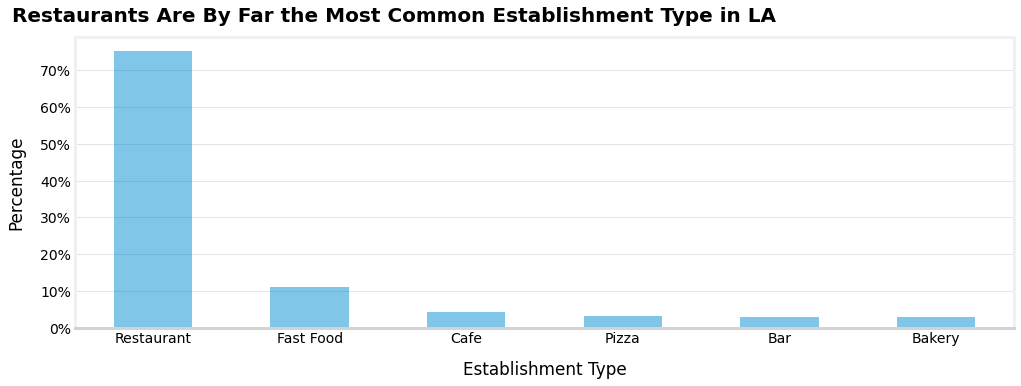

In [150]:
#plot
fig,ax =plt.subplots(facecolor='white')
establishment_proportion.plot(kind='bar',
                                   figsize=(15, 5),
                                   rot=0,
                                   alpha=.5)
ax.set_facecolor("white")

#tick
ax.tick_params(labelsize=14)
ax.tick_params(axis='both', left=False, bottom=False)
ax.yaxis.set_major_formatter(PercentFormatter(1))

#grid and spines
plt.grid(False, axis='x')
plt.grid(axis='y', linewidth=.5, zorder=2)
ax.spines['bottom'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

#labels
plt.ylabel('Percentage',labelpad=15)
plt.xlabel('Establishment Type',labelpad=15)
plt.title("Restaurants Are By Far the Most Common Establishment Type in LA",
          fontweight='semibold' ,
          fontsize=20,
          x=.34,
          pad=15)

plt.show()

Roughly 3/4 of establishments in LA are restaurants with fast food being the next most common type of establishment (~10%). On the other hand, Cafe the company's planned venue makes up 5% of establishments in LA. 

In [15]:
df['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

When looking at the count figures, we see that 7,255 of establishments in LA are of a restaurant type. In comparison, Cafes come at a low 435 count. TO build on this, it will be nice to look through the proportion of non-chain to chain establishments. 

In [16]:
df['chain'].value_counts(normalize=True)

False    0.618796
True     0.381204
Name: chain, dtype: float64

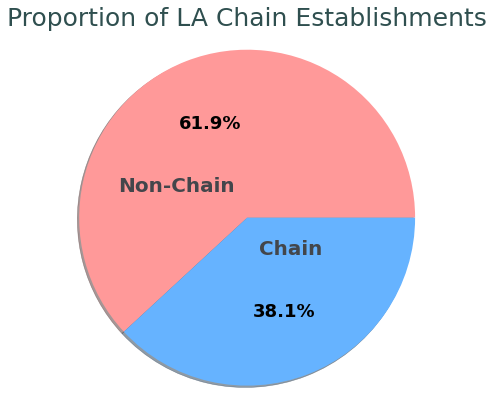

In [151]:
proportion_chain = df['chain'].value_counts(normalize=True) * 100
fig, ax = plt.subplots(facecolor='white')

patches, texts, autotexts = plt.pie(proportion_chain,
                                    labels=['Non-Chain', 'Chain'],
                                    labeldistance=.2,
                                    shadow=True,
                                    colors=['#ff9999', '#66b3ff'],
                                    autopct='%1.1f%%',
                                    textprops={
                                        'fontsize': 18,
                                        'fontweight': 'bold'
                                    },
                                    radius=1.8)

texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
for text in texts:
    text.set_color('#43464b')
    
plt.title("Proportion of LA Chain Establishments",
          pad=75,
          size=25,
          x=.5,
          color='darkslategray',
          fontname='sans-serif')

plt.show()

Non-chains establishments are 5% points away from representing 2/3 of the LA establishments. Knowing the share of LA restaurants , it will be interesting to see which type of establishment is typically a chain. 

Given the bool values we'll use the pivot_table() and group by establishment in order to retrieve the average chain value (between 0 and 1).

In [18]:
establishment_chain_proportion = df.pivot_table(index='object_type',
                                                values='chain').sort_values(
                                                    'chain', ascending=False)
establishment_chain_proportion

,chain
object_type,
Bakery,1.000000
Cafe,0.611494
Fast Food,0.567542
Pizza,0.481250
Restaurant,0.316196
Bar,0.263699


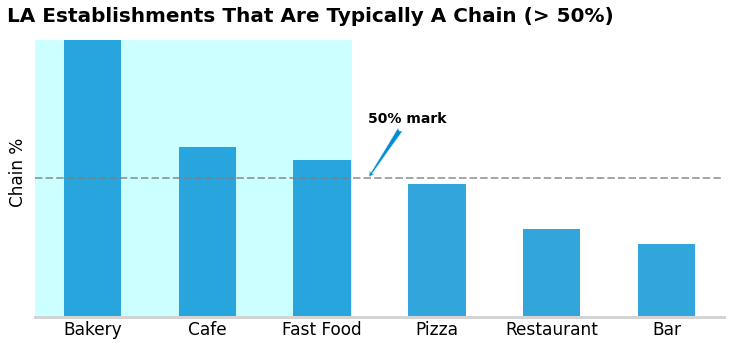

In [157]:
#plot
fig, ax = plt.subplots(figsize=(11, 5), facecolor='white')
ax.set_facecolor("xkcd:white")
establishment_chain_proportion.plot(kind='bar',
                                    rot=0,
                                    ax=ax,
                                    alpha=.8,
                                    legend=False)
plt.axhline(.5, xmin=0, linewidth=2, linestyle='--', alpha=.7, color='gray')

#shading
plt.fill_between(
    (-.8, 2.25), 1, 0,
    color='cyan',  # The outline color
    alpha=0.2)

#tick 
ax.tick_params(axis='x', labelsize=17)
ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.annotate("50% mark",
             xy=(2.4, .5),
             xytext=(2.4, .7),
             color='black',fontweight='bold',
             arrowprops=dict(arrowstyle="fancy"))
#spines
sns.despine()
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_visible(False)
plt.grid(False, axis='both')

#labels
ax.set_yticklabels('')
plt.xlabel("")
plt.ylabel('Chain %')
plt.title("LA Establishments That Are Typically A Chain (> 50%)",
          fontsize=20,
          x=.40,
          pad=0,
          fontweight='semibold')

plt.show()

Interestingly enough, restaurants are less likely to be a chains; this is likely the reason why non-chains were well represented in the pie chart earlier. Of special consideration, is the company's soon-to-be establishment type, Cafes, and their likelihood to be a chain rather than a non-chain. 

> This figures parallels a findings by the in-depth (5,000 surveys and more than 100 interviews) coffee market research conducted by Allegra World Coffee [1] that stated that nearly 4 out of 5 (78%) coffee shops are chain establishment [2] . 

[1] Source: <a href="https://www.worldcoffeeportal.com/Research/LatestReports/Project-Cafe-USA-2020"> <b>Allegra World Coffee - Project Café USA 2020 Survey</b></a>

[2] Source: <a href="https://dailycoffeenews.com/2019/10/25/nearly-four-of-every-five-us-coffee-shops-are-now-starbucks-dunkin-or-jab-brands/">Article summarizing the report since it was paid - <b>Daily Coffee News</b>  </a>

Thinking long term, given the aforementioned figures, the company will fare well if it is to either aggressively grow in its beginning phase as a Cafe to: differentiate itself from other Cafes and then become a chain establishment. Another more appealing option is establishing a restaurant. 

Let's explore the chain establishments to get further insights. In particular, to answer the question -  What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [20]:
#series with # of seats for all chain establishments
is_chain_seat_num = df[df['chain'] == True]['number']

In [21]:
print(is_chain_seat_num.agg('mode'))
is_chain_seat_num.describe()

0    12
dtype: int64


count    3679.000000
mean       39.675455
std        43.426312
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

Chain Establishments have on average 39 seats with a median of 25 and a mode of 12 seats. From the given data, these seats range from 1 all the way up to 229 seats with a large standard deviation of 43 seats.

> NOTE: 
To get a clearer view of how the establishment types differ among the seats, the seats were split into two categories: "few" and "many." After looking through the values this logic was confirmed by the graph and value counts output showing an absent value gap between 50 and 60. See bellow:

In [22]:
print("Less than or Equal to 49:",
      is_chain_seat_num[is_chain_seat_num >= 49].sort_values().head(10).values)

print("Greater than 49:",
      is_chain_seat_num[is_chain_seat_num > 49].sort_values().head(10).values)

Less than or Equal to 49: [49 49 49 49 49 49 49 49 49 49]
Greater than 49: [61 61 61 62 62 62 62 62 62 62]


As such for further analysis a seat category column was made:

In [23]:
df['seat_cat'] = df['number'].apply(
    lambda x: 'few' if x < 50 else 'many')
df['seat_cat'].head()

0    few
1    few
2    few
3    few
4    few
Name: seat_cat, dtype: object

Before investigating that column let's return to answering the question posed:

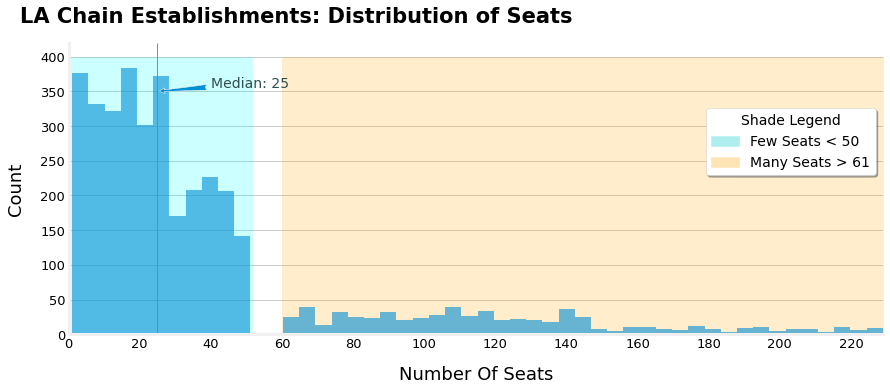

In [166]:
#plot
fig, ax = plt.subplots(figsize=(13,5), facecolor='white')
ax.set_facecolor("xkcd:white")
plt.hist(is_chain_seat_num, alpha=.6, bins=50)

#shading and median
plt.fill_between(
    (0.1, 51.5), 400, 0,
    color='cyan', 
    alpha=0.2)
plt.fill_between(
    (60, is_chain_seat_num.max()), 400, 0,
    color='orange',  
    alpha=0.2)
plt.axvline(is_chain_seat_num.median(), color='gray', linewidth=.9)

#ticks
plt.xlim(0, is_chain_seat_num.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.tick_params(labelsize=13)

azure_patch = mpatches.Patch(color='paleturquoise', label='Few Seats < 50')
orange_patch = mpatches.Patch(color='moccasin', label='Many Seats > 61')
plt.legend(handles=[azure_patch, orange_patch],
           loc='upper right',
           title='Shade Legend',
           facecolor='white',
           fancybox=True,
           shadow=True,bbox_to_anchor=(0, 0, 1, .8),
           fontsize=14
          )

#annotate, despine, and grid
plt.annotate("Median: " + str(int(is_chain_seat_num.median())),
             xy=(25, 350),
             xytext=(40, 355),
             color='darkslategray',
             arrowprops=dict(arrowstyle="fancy"))
sns.despine()
plt.grid(False, axis='x')

#labels
plt.title("LA Chain Establishments: Distribution of Seats",
          fontsize=21,
          x=.28,
          pad=20,
          fontweight='bold')
plt.xlabel('Number Of Seats', labelpad=15, fontsize=18)
plt.ylabel('Count', labelpad=15, fontsize=18)

plt.show()

In [25]:
df[df['chain'] == True]['seat_cat'].value_counts(normalize=True)

few     0.825224
many    0.174776
Name: seat_cat, dtype: float64

At a median of 25 seats, the share of chain establishments given the distribution, leans more towards low number of seats (1-50 seats)--roughly 82% of establishments.In addition,notice the right skewed tail and  very low share % count. Considering the proportion and shade for the "many seats" category, indicating that the distribution indicates that chain  establishments are characterized by a few establishments with a lot of seats.

<p style="color:blue">To reviewer: This was a challenging question. I'm not sure if my approach was right or where I could have improver here but I tried my best. Interpreting the distribution was challenging as well. Any resources you'd recommend?</p>

When observing the distribution of seats, another question came to mind: Which establishment type, relative to their total, has the highest concentration of establishments with "many seats." In particular for the chain establishments.

In [26]:
# chain establishment, and seat category
establishment_seat = df[df['chain'] == True][['object_type', 'seat_cat']]

For our graph, we'll want to turn the category into numerical values to graph each establishment types proportion of chain or non-chain value.

In [27]:
establishment_seat = pd.get_dummies(establishment_seat,
                                    columns=['seat_cat']).copy()

In [28]:
establishment_seat_pivot = establishment_seat.groupby(
    'object_type').mean().sort_values('seat_cat_many')
establishment_seat_pivot

,seat_cat_few,seat_cat_many
object_type,,
Cafe,0.966165,0.033835
Bakery,0.950530,0.049470
Pizza,0.928571,0.071429
Fast Food,0.818182,0.181818
Restaurant,0.790323,0.209677
Bar,0.766234,0.233766


A stacked bar chart to observe our results.

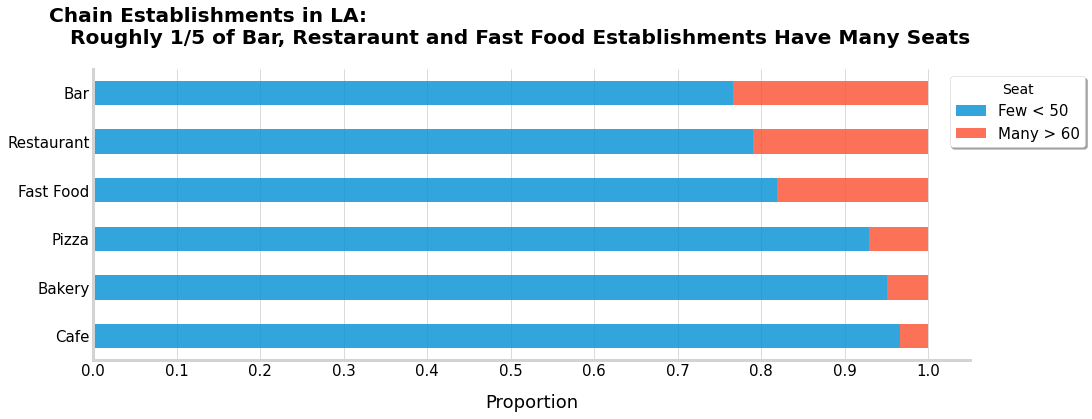

In [176]:
#plot
fig, ax = plt.subplots(figsize=(14,5), facecolor='white')
ax.set_facecolor("xkcd:white")
establishment_seat_pivot.plot.barh(stacked=True, ax=ax, alpha=.8)

#spines and grid
sns.despine()
plt.grid(False, axis='y')
plt.grid(axis='x', alpha=.7)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

plt.legend(['Few < 50', 'Many > 60'],
           shadow=True,
           fancybox=True,
           title='Seat',
           facecolor='white',
           fontsize=15,
           bbox_to_anchor=(0, 0, 1.14, 1))

#tick
ax.tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.10))

#label
plt.ylabel('')
plt.xlabel('Proportion', labelpad=15, fontsize=18)
plt.title(
    "Chain Establishments in LA: \n   Roughly 1/5 of Bar, Restaraunt and Fast Food Establishments Have Many Seats",
    pad=25,
    fontweight='semibold',
    x=-.05,
    ha='left')

plt.show()

So for the chain establishments, few seats still proportion for each establishment type fall near 80% if not, more above that proportion. The graph does show that the "many seat" proportion for establishment types, of which restaurants have by far the greatest share, where likely the reason of bringing the overall "few seats" proportion down to 80%. Moreover the few Seats % for restaurants establishment indicates that there are many small chain restaurants in LA. Lastly, Cafe chain establishments seem to be nearing 100% in their proportion of "few seats" value (< 50). 

Let's look at how these numbers look when we consider only the average and not the proportions.

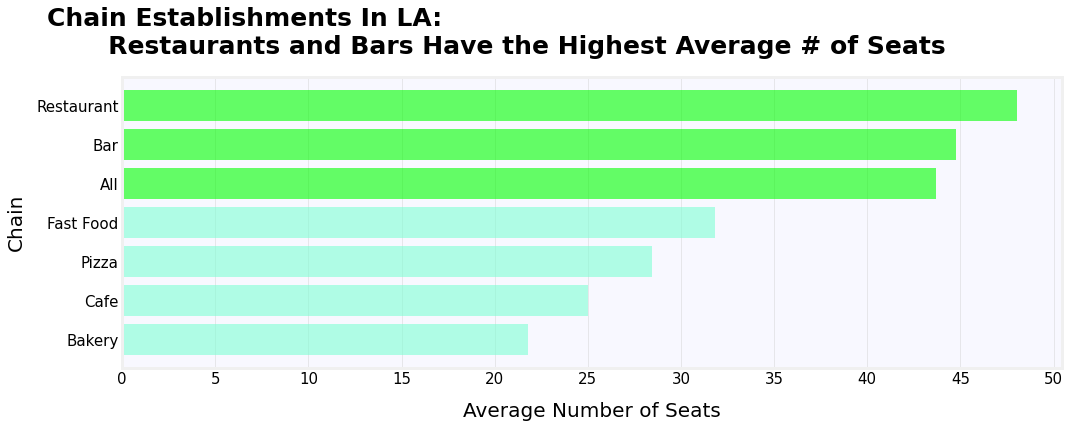

In [178]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='white')
ax.set_facecolor("ghostwhite")
avg_seat_establishment = df.pivot_table(index='object_type',
                                        values='number',
                                        margins=True,
                                        aggfunc='mean')
color = [
    'lime' if int(i) > 40 else 'aquamarine'
    for i in avg_seat_establishment.sort_values('number').values]

ax.barh(avg_seat_establishment.sort_values('number').index,
        avg_seat_establishment.sort_values('number')['number'],
        color=color,
        alpha=.6)

ax.tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))


plt.grid(False, axis='y')
plt.grid(axis='x', alpha=.4)

plt.xlabel("Average Number of Seats", labelpad=15, fontsize=20)
plt.ylabel("Chain", labelpad=10, fontsize=20)
plt.title(
    "Chain Establishments In LA:\n       Restaurants and Bars Have the Highest Average # of Seats",
    x=-.08,
    pad=23,
    size=25,
    ha='left',
    fontweight='semibold')

plt.show()

In [31]:
avg_seat_establishment.sort_values('number').transpose()

object_type,Bakery,Cafe,Pizza,Fast Food,All,Bar,Restaurant
number,21.773852,25.0,28.459375,31.837711,43.695161,44.767123,48.042316


When we consider the aggregate average, notice how the 4 establishment types' average number of seats fall more than 10 seats below it. This further reinforces the notion  of restaurant--including bars--establishments containing a larger share of "many seats" relative to the other establishments. On the seat distributions, a majority of the "many seats" on the distribution can be attributed to restaurants or bars. Let's quickly check this assumption.

In [32]:
df.query("object_type not in ['Restaurant','Bar']")['seat_cat'].value_counts(
    normalize=True) * 100

few     90.922053
many     9.077947
Name: seat_cat, dtype: float64

In [33]:
df.query("object_type in ['Restaurant','Bar']")['seat_cat'].value_counts(
    normalize=True) * 100

few     76.175964
many    23.824036
Name: seat_cat, dtype: float64

Roughly 9% of establishments with a relatively low avg. seat count contain many seats (>61). In comparison, those with a high avg. count, Restaurants an Bars, have more than double that proportion--around 23% of establishments with many seats (>61). This makes sense and will be taken into account when presenting a recommendation.

After a brief reflection on these figures, let's explore the restaurant establishments in more detail.

In [34]:
is_restaurant = df[df['object_type'] == 'Restaurant']

We'll start the exploration by plotting the top 10 streets based on their number of restaurant establishments. We'll use the following function to (1) delete some irrelevant strings in order to keep only the name of the streets. 

In [35]:
def get_street(x):
    split_address = x.replace("#", "").replace("/", "").split()
    new = []
    for i in split_address:
        if i.isdigit():
            continue
        else:
            new.append(i)
    return ' '.join(new)

In [36]:
is_restaurant['street'] = is_restaurant['address'].apply(
    lambda x: get_street(x))

C:\Users\garci\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now let's plot.

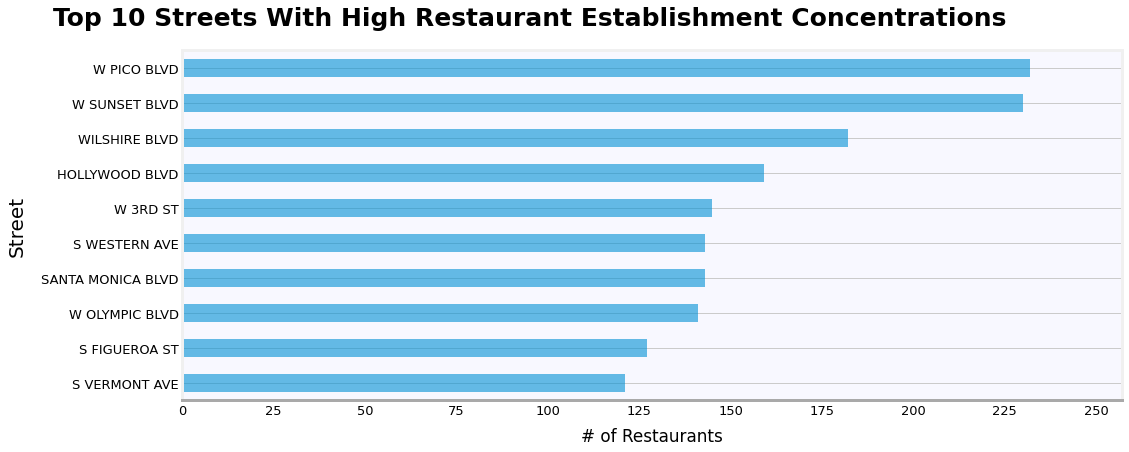

In [183]:
fig, ax = plt.subplots(facecolor='white')
ax.set_facecolor("ghostwhite")
is_restaurant['street'].value_counts().head(10).sort_values().plot.barh(figsize=(15,6),
                                                         rot=0,
                                                         alpha=.6)

plt.xlim(0,is_restaurant['street'].value_counts().max()+25)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.tick_params(axis='both', left=False, bottom=False, labelsize='13')

ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')

plt.ylabel('Street', labelpad=15, fontsize=20)
plt.xlabel('# of Restaurants',labelpad=10)
plt.title("Top 10 Streets With High Restaurant Establishment Concentrations",
          fontsize=25,
          x=.37,
          fontweight='semibold',
          pad=25)

plt.show()

These streets contain more than 110 and up to 230 restaurants establishments! These streets may be of interest for the company if they want to enter a competitive but thriving market.

What if the company wants to launch in a street with only 1 restaurant establishment. Let's quickly calculate the % and number of streets that fit that description. 

In [38]:
print('Count (All):', len(is_restaurant['street'].value_counts()))
print(
    '1 restaurant (Count):',
    len(is_restaurant['street'].value_counts()[
        is_restaurant['street'].value_counts() == 1]))
print(
    '1 Restaurant (%):',
    len(is_restaurant['street'].value_counts()[
        is_restaurant['street'].value_counts() == 1]) /
    len(is_restaurant['street'].value_counts()))

Count (All): 1503
1 restaurant (Count): 1017
1 Restaurant (%): 0.6766467065868264


Out of all the 1,503 streets that contain a restaurant establishment, 1,107 or 68% of them contain only one of such establishment.

Considering the 7k count of total restaurants seen earlier, the 32% of streets containing more than 1 restaurant establishment may be of interest to the company; let's investigate these streets a little further.

First we'll want to segment the streets into two: few and many restaurants.Let's look at the distribution first to help in defining "a lot" of restaurants.

In [39]:
is_restaurant['street'].value_counts().quantile(.67)

1.0

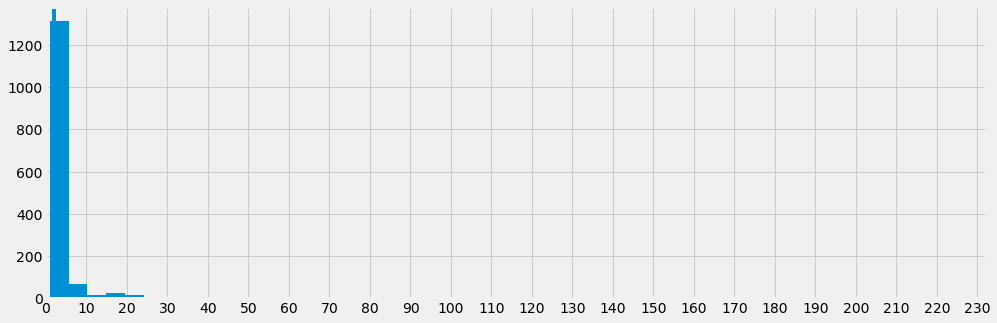

In [40]:
ax=is_restaurant['street'].value_counts().hist(bins=50,figsize=(15,5))
plt.axvline(is_restaurant['street'].value_counts().quantile(.68))
plt.xlim(0, is_restaurant['street'].value_counts().max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

From the graph, we'll choose >10 restaurants as our definition for "lots of" restaurants for a street. 

In [41]:
street_more_than_10_restaurants = is_restaurant['street'].value_counts()[
    is_restaurant['street'].value_counts() > 10].index

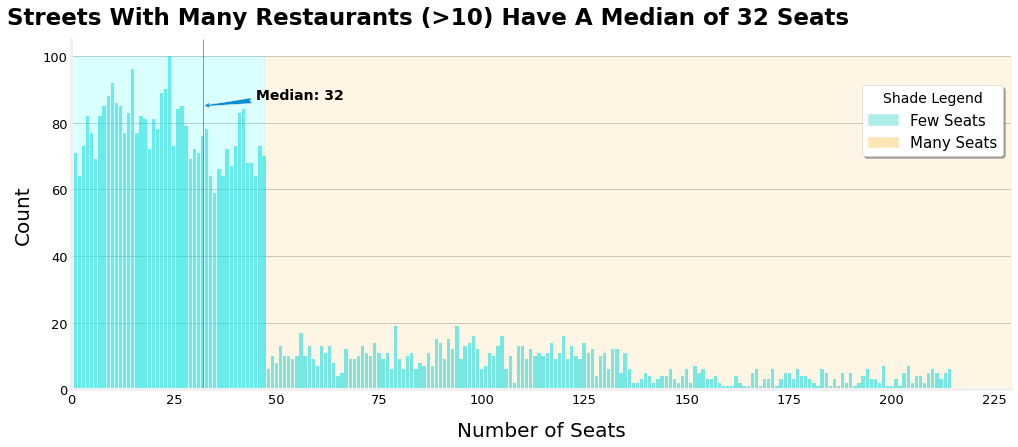

In [190]:
lots_restaurant_number_seats = is_restaurant.query(
    "street in @street_more_than_10_restaurants")['number']

fig, ax = plt.subplots(figsize=(15,6), facecolor='white')
sns.countplot(lots_restaurant_number_seats, alpha=.6, color='cyan')
plt.axvline(lots_restaurant_number_seats.median(), alpha=.7, linewidth=1)
ax.set_facecolor("white")

freq = int(25)
xticks = ax.get_xticks()
ax.set_xticks(np.append(xticks[::25], lots_restaurant_number_seats.max() - 4))
ax.set_xticklabels(
    np.append(xticks[::25],
              lots_restaurant_number_seats.max() - 4))
plt.xlim(0, lots_restaurant_number_seats.max())
ax.tick_params(labelsize=13)

plt.annotate("Median: " + str(int(lots_restaurant_number_seats.median())),
             xy=(lots_restaurant_number_seats.median(), 85),
             xytext=(45, 87),fontweight='bold',
             arrowprops=dict(arrowstyle="fancy"))
sns.despine()

plt.fill_between(
    (0.1, 47), 100,0,
    color='cyan',  
    alpha=0.15)
plt.fill_between(
    (47.01, lots_restaurant_number_seats.max()),100,0,
    color='orange',  
    alpha=0.1)

azure_patch = mpatches.Patch(color='paleturquoise', label='Few Seats')
orange_patch = mpatches.Patch(color='moccasin', label='Many Seats')
plt.legend(handles=[azure_patch, orange_patch],
           loc='upper right',
           title='Shade Legend',
           facecolor='white',
           fancybox=True,bbox_to_anchor=(0, 0, 1, .89),
           shadow=True,
           fontsize=15)

plt.xlabel("Number of Seats", labelpad=15, fontsize=20)
plt.ylabel("Count", labelpad=10, fontsize=20)
plt.title("Streets With Many Restaurants (>10) Have A Median of 32 Seats\n  ",
          fontsize=23,
          x=.38,
          y=.95,
          fontweight='semibold')
plt.show()

Here we can observe the same pattern seen in the overall number of seats distribution. 

Let's take a look at how these number will look between chain and non-chain establishments for streets with many restaurants.

In [43]:
is_over10restaurant_chain = is_restaurant.query(
    "street in @street_more_than_10_restaurants and chain==True")
is_over10restaurant_non_chain = is_restaurant.query(
    "street in @street_more_than_10_restaurants and chain==False")

In [44]:
chain_restaraunt_many_street = is_over10restaurant_chain['number']
non_chain_restaraunt_many_street = is_over10restaurant_non_chain['number']

In [45]:
chain_restaraunt_many_street.max(), non_chain_restaraunt_many_street.max()

(229, 229)

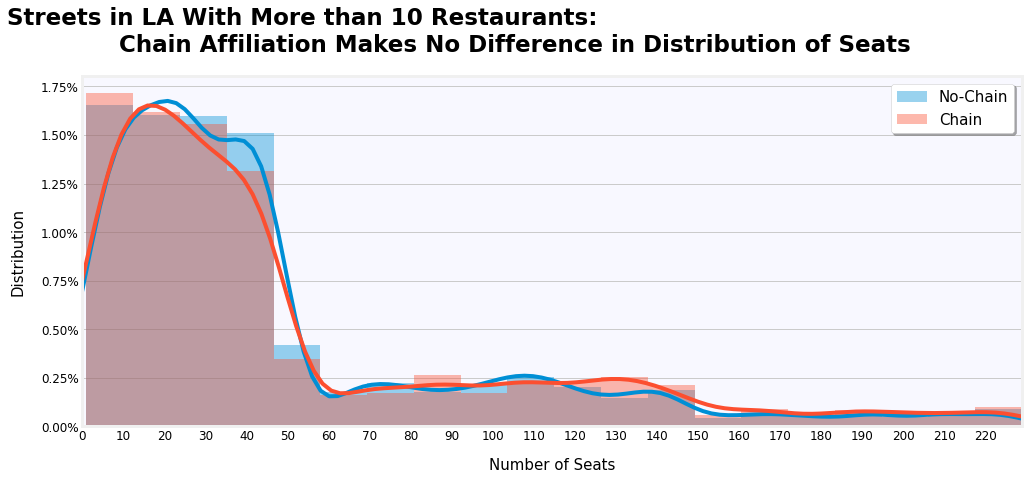

In [194]:
fig, ax = plt.subplots(figsize=(15,6), facecolor='white')
ax.set_facecolor("ghostwhite")
sns.distplot(chain_restaraunt_many_street, bins=20)
sns.distplot(non_chain_restaraunt_many_street, bins=20)

def mjrFormatter(x, pos):
    return "{:.2f}%".format(x * 100)
plt.grid(False, axis='x')

plt.xlim(0, chain_restaraunt_many_street.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(labelsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))

plt.legend(['No-Chain', 'Chain'], fancybox=True, shadow=True, fontsize=15,facecolor='white')

plt.xlabel('Number of Seats', labelpad=15, fontsize=15)
plt.ylabel('Distribution', labelpad=15, fontsize=15)
plt.title(
    "Streets in LA With More than 10 Restaurants:\n              Chain Affiliation Makes No Difference in Distribution of Seats",
    fontsize=23,
    x=-.08,
    pad=25,
    ha='left',
    fontweight='semibold')

plt.show()

Distribution of seats can be split into two groups (many and few) and does not differ amongst chains and non-chain restaurant establishments


## Summary

### LA Establishments:
- Total count : 9,651
- 62% -> non-chains and 38& -> chains
- Two groups for chains: 
    - Few Seats (< 50) and Many seas (>61)

### Café
- Roughly 4.5% of the market share
- More likely to be a chain (61.1%) -> % set to continue increasing
- The smallest share of with CHAIN establishments with more than 61
- Chains:
    - Roughly 25 avg. number of seats 

### Restaurant
- Make up roughly 75% of the establishments in LA
- More likely to be non-chains (68.4%)
- CHAINS:
    - 1/5 or 20% have many seats(> 60)
    - Have on average 48 seats 
- 68% of streets contain 1 restaurant whilst 32% contain more than 1; top 10 streets contain between 110 and 230 restaurants.
   - Streets with more than 10 restaurants
       - Have a median of 32 seats
       - Distribution of seats can be split into two groups and does not differ amongst chains and non-chain restaurant establishments.

## Conclusion

### When thinking about establishing in LA, given (1) chosen establishment (small Cafe), (2) the novelty of the service provided (robot waiters), (3) the current market conditions, (4) cost of the project, and (5) long-term goal to maintain a successful establishment, the following recommendation is given:


>- The company should pivot towards establishing a restaurant as there is less big players (chains) in that market relative to Cafes; small Cafes are being outcompeted by Cafe chains. 
>- Large share of establishments in LA, especially considering their high % of non-chain establishments make it relatively easier to compete and thrive given the service it will provide.
>- The company should consider starting off as a non-chain with 48 seats and depending on its strategy, establish itself in a street with many restaurants and/or one restaurant. It can then aggressively grow and establish a chain thereafter given the novelty of service provided.
